In [1]:
import json
from backend.models import UserDocument
from ai_module.lg_models import CVGenState

# Charger les données de test
with open('../../data/user_test_user.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Créer un UserDocument à partir des données de test
user_doc = UserDocument(**test_data)

# Créer un CVGenState à partir du UserDocument
# Utilisons "CV par défaut" comme nom de CV
cv_state = CVGenState.from_user_document(user_doc, "cv_1")

# Afficher les informations principales du CVGenState
print(f"Nom: {cv_state.head.name}")
print(f"Titre brut: {cv_state.head.title_raw}")
print(f"Titre raffiné: {cv_state.head.title_refined}")
print(f"Email: {cv_state.head.mail}")
print(f"Téléphone: {cv_state.head.tel_refined}")
print(f"\nNombre d'expériences: {len(cv_state.experiences)}")
print(f"Nombre de formations: {len(cv_state.education)}")
print(f"\nCompétences brutes: {cv_state.skills_raw}")
print(f"Langues brutes: {cv_state.langues_raw}")
print(f"Centres d'intérêt: {cv_state.hobbies_refined}")
print(f"\nPoste visé brut: {cv_state.job_raw}")

Nom: Alexis de Monts
Titre brut: Data Engineer | Machine Learning Engineer | Cloud Architect
Titre raffiné: 
Email: alexis.demonts.s@gmail.com
Téléphone: 

Nombre d'expériences: 8
Nombre de formations: 3

Compétences brutes: Cloud (GCP, AWS), DevOps (CI/CD, Docker), MLOps, Data Science, Machine Learning, Data Engineering, Python, SQL, Git, Flutter
Langues brutes: Francais (natif), Anglais (courant), Italien (fonctionnel)
Centres d'intérêt: Technologies emergentes, developpement d'applications, voyages, engagement humanitaire

Poste visé brut: Fiche de Poste - Machine Learning Engineer

Localisation : Paris, France (Hybrid)

Type de Contrat : CDI

Experience : 3+ ans

Salaire : 55k - 75k EUR selon experience

Secteur : Tech / IA / Data


A propos de nous

Nous sommes une startup innovante specialisee dans l'intelligence artificielle et le traitement des donnees a grande echelle. Nous developpons des solutions de Machine Learning et Deep Learning pour optimiser la prise de decision et au

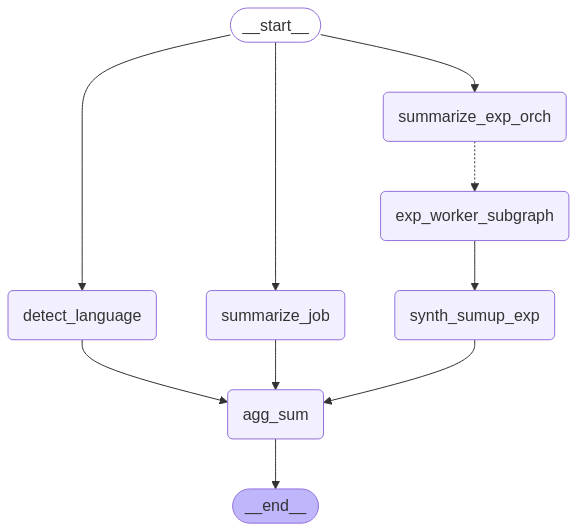

In [2]:
# Importer le graphe compilé pour la génération de CV
from ai_module.chains_gen_cv.gen_cv_chain import create_cv_chain
from IPython.display import Image, display

graph = create_cv_chain()

display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
# Tester le graphe compilé pour la génération de CV
config = {"configurable": {"thread_id": "exemple"}}
result = graph.invoke(cv_state, config=config)



ValueError: Checkpointer requires one or more of the following 'configurable' keys: ['thread_id', 'checkpoint_ns', 'checkpoint_id']

In [1]:
from ai_module.chains_gen_cv.gen_cv_chain import create_cv_chain
# Création de la chaîne de traitement du CV
cv_chain = create_cv_chain()



In [ ]:
from ai_module.lg_models import CVExperience

# Exemple d'inputs pour le CV
inputs = {
    "job_raw": "Description détaillée du poste à résumer...",
    "experiences": [
        CVExperience(
            title_raw="Développeur",
            company_raw="Entreprise X",
            location_raw="Paris",
            dates_raw="2020-2021",
            description_raw="Développement d'applications web.",
            summary=""  # Champ vide initialement
        )
    ]
}


# Configuration avec un identifiant de thread pour suivre l'exécution
config = {"configurable": {"thread_id": "exemple"}}

# Exécution du graphe en mode "updates" avec les sous-graphes, ce qui nous permettra
# d'interrompre l'exécution avant le nœud 'summarize_exp' pour inspecter l'état.
for update in cv_chain.stream(inputs, config=config, stream_mode="updates", subgraphs=True):
    print(update)



In [ ]:
# Récupération et affichage de l'état courant du graphe, y compris celui du sous-graphe.
state = cv_chain.get_state(config, subgraphs=True)
print("État du graphe principal :", state.values)
if state.tasks:
    sub_state = state.tasks[0].state
    print("État du sous-graphe :", sub_state.values)



In [ ]:
# Exemple de mise à jour de l'état du sous-graphe.
# Ici, nous simulons une modification manuelle du résumé dans le sous-graphe
# en se positionnant sur le nœud 'summarize_exp'.
cv_chain.update_state(
    sub_state.config,
    {"summary": "Résumé mis à jour manuellement de l'expérience."},
    as_node="summarize_exp"
)



In [ ]:
# Reprise de l'exécution après mise à jour de l'état.
for update in cv_chain.stream(None, config=config, stream_mode="updates", subgraphs=True):
    print(update)



In [ ]:
# Affichage final de l'état après exécution complète.
final_state = cv_chain.get_state(config)
print("État final du graphe :", final_state.values)